# Contents
    1. Simple Moving Average (SMA)
    2. Cumulative Moving Average (CMA)
    3. Exponential Weight Moving Average (EWMA)
    4. Moving Average (MA) - Autocorrelation function (ACF)
    5. Autoregressive Model (AR) - Partial-Autocorrelation function (PACF)

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime, timedelta
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
## AIRBUS stock data
df_air = pdr.get_data_yahoo('AIR.PA')
df_air

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-20,81.269997,80.220001,81.059998,80.720001,1511806.0,74.739449
2017-10-23,81.879997,80.330002,80.639999,81.290001,944252.0,75.267227
2017-10-24,83.760002,81.150002,81.209999,83.250000,2887232.0,77.082016
2017-10-25,84.330002,82.309998,82.839996,83.470001,2036221.0,77.285713
2017-10-26,85.959999,83.559998,83.889999,85.809998,2146664.0,79.452339
...,...,...,...,...,...,...
2022-10-13,97.430000,93.040001,93.510002,96.900002,1620868.0,96.900002
2022-10-14,99.339996,96.260002,98.720001,96.589996,1271176.0,96.589996
2022-10-17,99.879997,96.589996,96.690002,99.099998,1039975.0,99.099998


# Simple Moving Average (SMA)

$SMA = \frac{A_1 + A_2 + ... + A_n}{n}$

<AxesSubplot:xlabel='Date'>

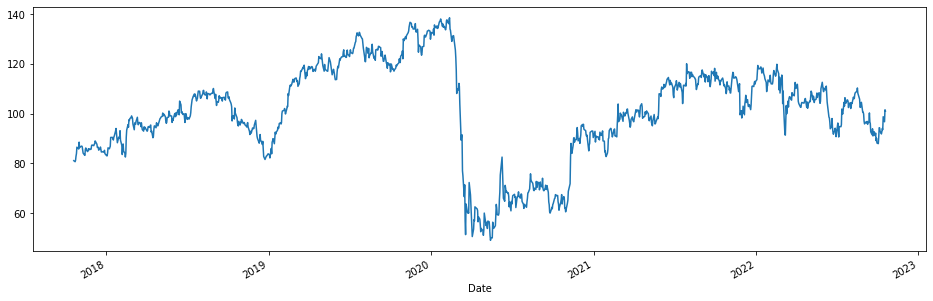

In [3]:
df_air['Open'].plot(figsize=(16,5))

In [4]:
df_air['Open-10 days rollling'] = df_air['Open'].rolling(window=10, min_periods=1).mean()

In [5]:
df_air.head()

,High,Low,Open,Close,Volume,Adj Close,Open-10 days rollling
Date,,,,,,,
2017-10-20,81.269997,80.220001,81.059998,80.720001,1511806.0,74.739449,81.059998
2017-10-23,81.879997,80.330002,80.639999,81.290001,944252.0,75.267227,80.849998
2017-10-24,83.760002,81.150002,81.209999,83.250000,2887232.0,77.082016,80.969999
2017-10-25,84.330002,82.309998,82.839996,83.470001,2036221.0,77.285713,81.437498
2017-10-26,85.959999,83.559998,83.889999,85.809998,2146664.0,79.452339,81.927998


<AxesSubplot:xlabel='Date'>

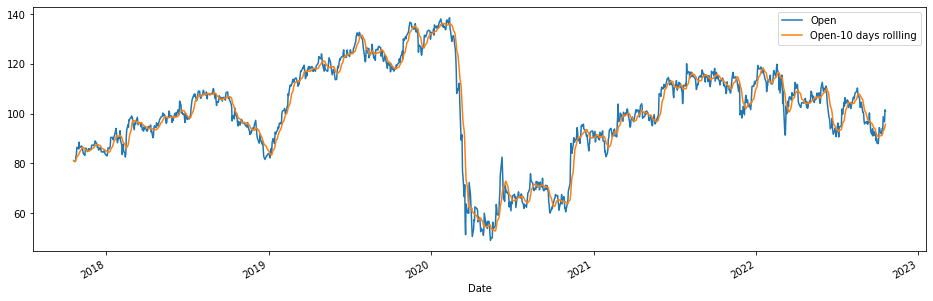

In [6]:
df_air[['Open', 'Open-10 days rollling']].plot(figsize=(16,5))

In [7]:
df_air['Open-30 days rollling'] = df_air['Open'].rolling(window=30, min_periods=1).mean()
df_air['Open-50 days rollling'] = df_air['Open'].rolling(window=50, min_periods=1).mean()
df_air.head(10)

,High,Low,Open,Close,Volume,Adj Close,Open-10 days rollling,Open-30 days rollling,Open-50 days rollling
Date,,,,,,,,,
2017-10-20,81.269997,80.220001,81.059998,80.720001,1511806.0,74.739449,81.059998,81.059998,81.059998
2017-10-23,81.879997,80.330002,80.639999,81.290001,944252.0,75.267227,80.849998,80.849998,80.849998
2017-10-24,83.760002,81.150002,81.209999,83.250000,2887232.0,77.082016,80.969999,80.969999,80.969999
2017-10-25,84.330002,82.309998,82.839996,83.470001,2036221.0,77.285713,81.437498,81.437498,81.437498
2017-10-26,85.959999,83.559998,83.889999,85.809998,2146664.0,79.452339,81.927998,81.927998,81.927998
2017-10-27,88.230003,85.900002,86.470001,86.559998,3112118.0,80.146774,82.684999,82.684999,82.684999
2017-10-30,86.250000,84.430000,86.029999,84.709999,2219520.0,78.433838,83.162856,83.162856,83.162856
2017-10-31,89.120003,85.430000,85.750000,87.750000,3186345.0,81.248604,83.486249,83.486249,83.486249
2017-11-01,88.500000,87.029999,88.500000,87.379997,1663464.0,80.906021,84.043332,84.043332,84.043332


<AxesSubplot:xlabel='Date'>

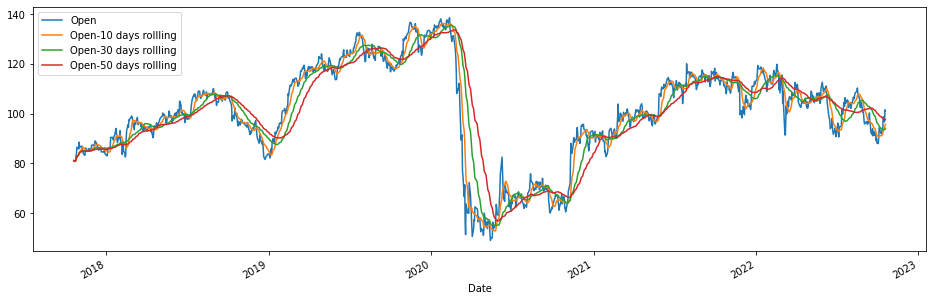

In [8]:
df_air[['Open', 'Open-10 days rollling', 'Open-30 days rollling', 'Open-50 days rollling']].plot(figsize=(16,5))

**Pros**:
* Smoothen the trends. So, easy to understand

**Cons**:
* Give similar importance to all the data

# Cumulative Moving Average (CMA)

In [9]:
df_air['Open-CMA'] = df_air['Open'].expanding().mean()

<AxesSubplot:xlabel='Date'>

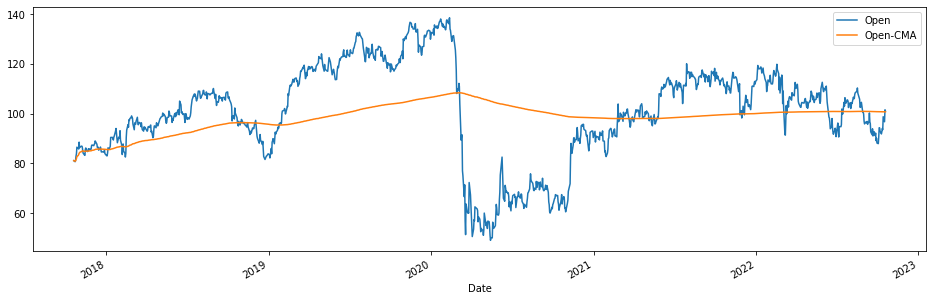

In [10]:
df_air[['Open', 'Open-CMA']].plot(figsize=(16,5))

# Expoential Moving Average (EMA)

$EMA_t = [(close - EMA_y) \times multiplier ] + EMA_y$

* multiplier: 2 / (window + 1)
* close: value at that time

$EMA_t = [V_t \times (\frac{s}{1 + d})] + EMA_y + [1 - (\frac{s}{1 + d})]$

* t: today
* y: yesterday
* s: smoothening
* d: days (window)
* V: value

# Expoential Weighted Moving Average (EWMA)

$EWMA_t = a \times x(t) + (1 - a) \times EWMA_y$

* a: weightage
* x: data
* **It is used to prevent any kind of lags**

<AxesSubplot:xlabel='Date'>

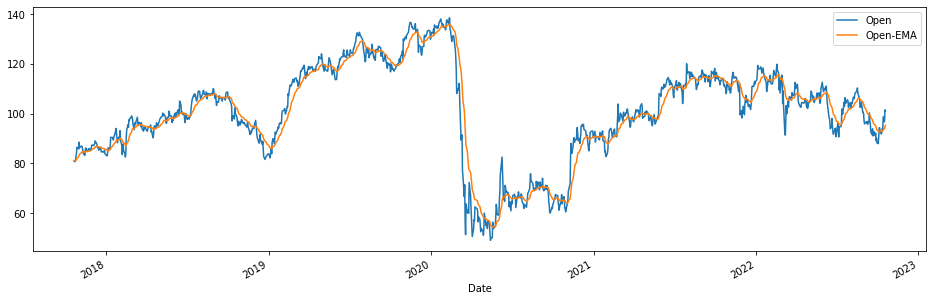

In [11]:
df_air['Open-EMA'] = df_air['Open'].ewm(alpha=0.1, adjust=False).mean()
df_air[['Open', 'Open-EMA']].plot(figsize=(16,5))

<AxesSubplot:xlabel='Date'>

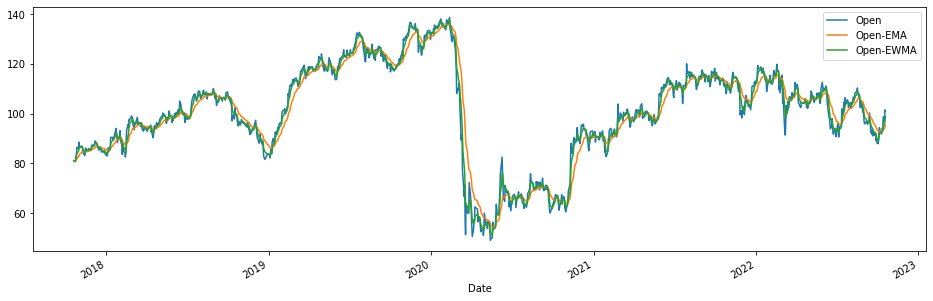

In [12]:
df_air['Open-EWMA'] = df_air['Open'].ewm(span=5).mean()
df_air[['Open', 'Open-EMA', 'Open-EWMA']].plot(figsize=(16,5))

# Autoregression (AR)

It applies regression algorithm in order to forecast using historical data (lags)

# PACF
* It will give `p` value.
* Apply `ARIMA` model.
* For `seasonal` data, apply `SARIMAX`


# ARIMA model

This odel works well for `stationary` data. In ARIMA we will find three variables:

* AR - p (find from PACF)
* Integrate (I) - d (no. of times differencing)
* MA - q (find from ACF)

For `stationarity` following conditions must satisfy:
* mean = constant
* standard deviation = constant
* no **seasonality**
    

**STEPS**:

1. check stationarity of data using `Dickey Fuller test`
    * Initialize H0: unit root = 1 (i.e. data is NOT stationary)
    * H1: unit root < 1 (i.e. data is stationary)
    * Dickey Fuller test statistics
2. If:
    * p < 0.5, H0 rejected, H1 accepted (i.e. data is stationary)
    
    else:
    * H0 accepted, H1 rejected (i.e. data is NOT stationary)




## Airline passenger dataset

In [13]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
print(df_airline.isnull().sum())
df_airline.tail()

Month                      0
Thousands of Passengers    0
dtype: int64


,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [15]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [17]:
df_airline.set_index('Month',inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

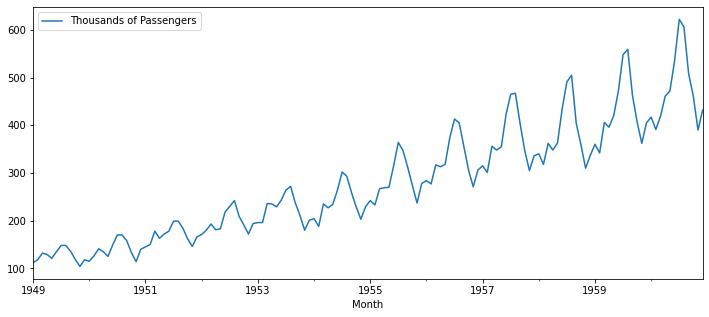

In [18]:
df_airline.plot(figsize=(12,5))

In [19]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060433
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
## Use Techniques Differencing
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)
df_airline.head(10)
## OR
# df_airline['Passengers First Difference'] = np.diff(df_airline['Thousands of Passengers'].values, n=1)

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [22]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169995
p- value: 0.05421329028382612
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference'] - df_airline['Passengers First Difference'].shift(1)
## OR
# df_airline['Passengers Second Difference'] = np.diff(df_airline['Passengers First Difference'].values, n=1)

In [24]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.3842315424685
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
# For seasonal data, here 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)
## OR
# df_airline['Passengers 12 Difference'] = np.diff(df_airline['Thousands of Passengers'].values, n=12)
df_airline.head(15)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [26]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924814
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


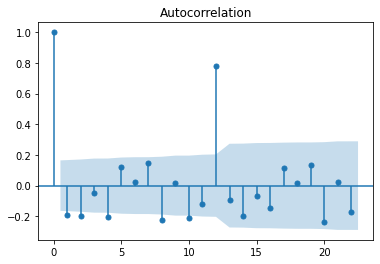

In [27]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

Here q = 12. It seems like some seasonality.

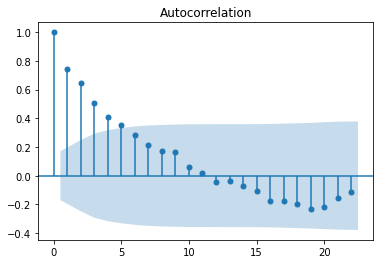

In [28]:
acf12  = plot_acf(df_airline["Passengers 12 Difference"].dropna())

Here q = 5.

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


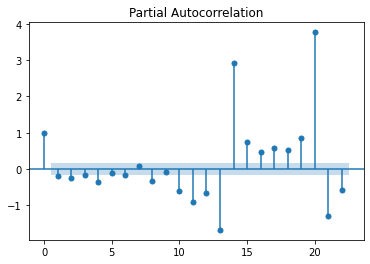

In [29]:
pacf = plot_pacf(df_airline["Passengers Second Difference"].dropna())

Here p = 2, 3, ...

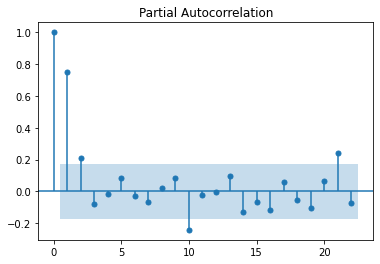

In [30]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

Here p = 2, 10, 22

In [31]:
### split train and test data
train_dataset_end = datetime(1955,12,1)
test_dataset_end  = datetime(1960,12,1)

train_data = df_airline[:train_dataset_end]
test_data  = df_airline[train_dataset_end + timedelta(days=1):test_dataset_end]

## ARIMA model

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1949-01-01 to 1955-12-01
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Thousands of Passengers       84 non-null     int64  
 1   Passengers First Difference   83 non-null     float64
 2   Passengers Second Difference  82 non-null     float64
 3   Passengers 12 Difference      72 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [33]:
model_ARIMA     = ARIMA(train_data['Thousands of Passengers'], order=(0,2,0)) # p,d,q = 14, 2, 0
model_Arima_fit = model_ARIMA.fit()
model_Arima_fit.summary()

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferr

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Wed, 19 Oct 2022   AIC                            775.563
Time:                                10:07:53   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [34]:
## Predictions

pred_start_date = test_data.index[0]
pred_end_date   = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [35]:
type(pred_start_date)

pandas._libs.tslibs.timestamps.Timestamp

In [36]:

St = datetime(1956,6,6)
en = datetime(1960,12,1)

pred      = model_Arima_fit.predict(start = datetime(1956,6,6), end = datetime(1960,12,1))
# pred      = model_Arima_fit.predict(start = St, end = en)
residuals = test_data['Thousands of Passengers'] - pred

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA'] = pred

test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

In [ ]:

acf12  = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

# SARIMAX model

In [37]:
model_SARIMA     = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))
model_SARIMA_fit = model_SARIMA.fit()
model_SARIMA_fit.summary()

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Wed, 19 Oct 2022   AIC                            548.481
Time:                                     10:08:24   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5990      0.937      0.639      0.523      -1.238       2.436
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1830      1.165      0.157      0.875      -2.100       2.466
ma.L2         -0.5348      1.263     -0.423      0.672      -3.010       1.941
ma.L3         -0.0985      0.384     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.337     -0.377      0.706      -0.789       0.534
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7274     81.182      1.081      0.280     -71.387     246.842
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
## Predictions
pred_start_date = test_data.index[0]
pred_end_date   = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [38]:
pred_Sarima = model_SARIMA_fit.predict(start = datetime(1956,6,6), end = datetime(1960,12,1))
residuals   = test_data['Thousands of Passengers'] - pred_Sarima

<AxesSubplot:xlabel='Month'>

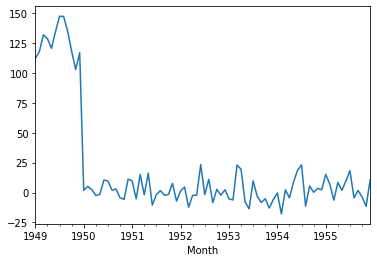

In [39]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

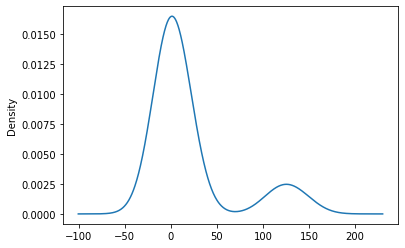

In [40]:
model_SARIMA_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_SARIMA'] = pred_Sarima

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

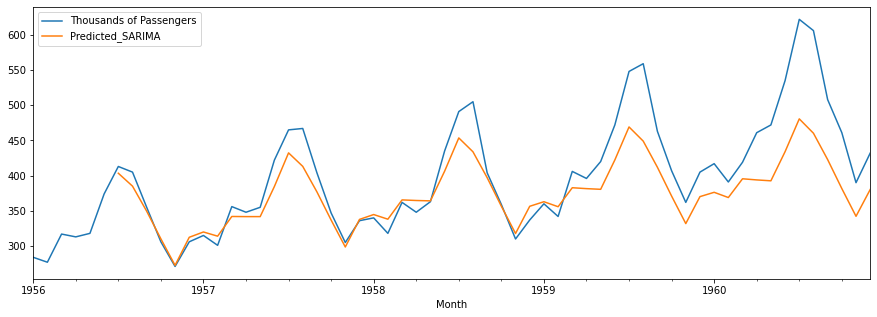

In [42]:
test_data[['Thousands of Passengers', 'Predicted_SARIMA']].plot(figsize=(15,5))

# Moving Average (MA) models
* A moving average process, or the moving average model, states that the current value is linearly dependent on the current and past error terms.
* The error terms are assumed to be mutually independent and `normally distributed` like `white noise`.
* Useful in forecasting time series.

A moving average model is denoted as `MA(q)` where `q` is the order. The model expresses the present value as a linear combination of the mean of the series $\mu$, the present error term $\epsilon$, and past error terms $\epsilon$. The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted with $\theta$. Mathematically, we express a general moving average process as follows:

$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_{n} \epsilon_{t-n}$

The order q of the moving average model determines the number of past error terms that affect the present value. For example, if it is of order one, meaning that we have a MA(1) process, then the model is expressed as follows:

$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}$

Hence, we can see how the order q of the MA(q) process affects the number of past error terms that must be included in the model. The larger q is, the more past error terms affect the present value. **Therefore, it is important to determine the order of the moving average process in order to fit the appropriate model**, meaning that if we have a second-order moving average process, then a second-order moving average model will be used for forecasting.

![Steps to identify an MA(q) model and its order](https://miro.medium.com/max/586/1%2AUxNs4UUR251MlA85aT4hMg.png)

**QUESTIONs**:

    1. Should I use ACF plot or PACF plot?
    2. Is PACF used for MA?
    3. Is ACF used for AR?





In [19]:
df = pd.read_csv('widget_sales.csv')
df.head() 

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


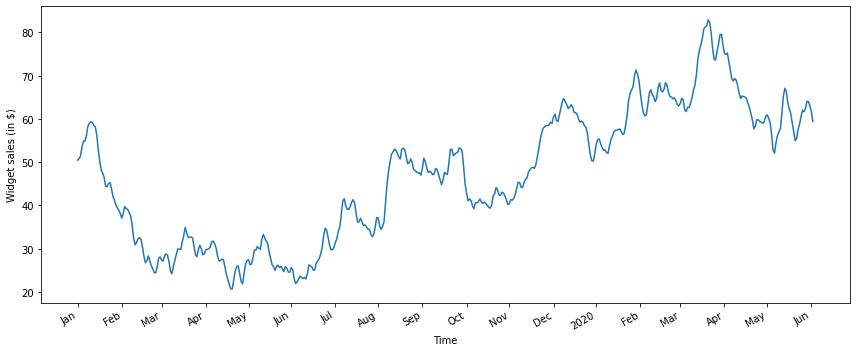

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.widget_sales)   
ax.set_xlabel('Time')      
ax.set_ylabel('Widget sales (in $)')
 
plt.xticks(
[0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])      #D
fig.autofmt_xdate()
plt.tight_layout() 

## Test for `Stationarity`

* We can use the `Ad-Fuller function (ADF)` to check `stationarity`
* If the ADF statistic is a large negative number and the `p-value` is smaller than 0.05, then our series is `stationary`. Otherwise, we must apply transformations.



In [25]:
ADF_result = adfuller(df.widget_sales)   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


In [26]:
# Since, this time series is not stationary and we must apply transformations to make it stationary.
# In order to make series stationary, try to stabilize the trend by applying a first-order differencing (n=1).

widget_sales_diff = np.diff(df.widget_sales, n=1)

## Run ADF again
ADF_result = adfuller(widget_sales_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341947
p-value: 7.0769228185877515e-19


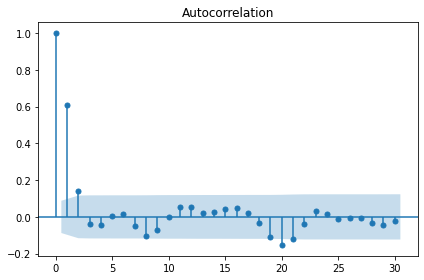

In [27]:
# Now time-series is stationary
# Next step is to plot the autocorrelation function

plot_acf(widget_sales_diff, lags=30)
plt.tight_layout()

* We notice that there are significant coefficients after lag 0. In fact, they are significant up until lag 2.
* Then, they abruptly become non-significant as they remain in the shaded area of the plot.
* We can see some significance around lag 20, but this is likely due to chance, as the following coefficients are not significant.

**Since we have significant autocorrelation coefficients up until `lag 2`, this means that we have a stationary moving average process of order 2. Therefore, we can use a second-order moving average model, or `MA(2) model`, to forecast our stationary time series.**

* The `ACF plot` helps us determine the order of a MA process.
* The `ACF plot` will show significant `autocorrelation coefficients up until lag q`, after which all coefficients will be non-significant i.e. we have a MA process of order q or MA(q) process. 

In [28]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train = df_diff[:int(0.9*len(df_diff))]
test =  df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


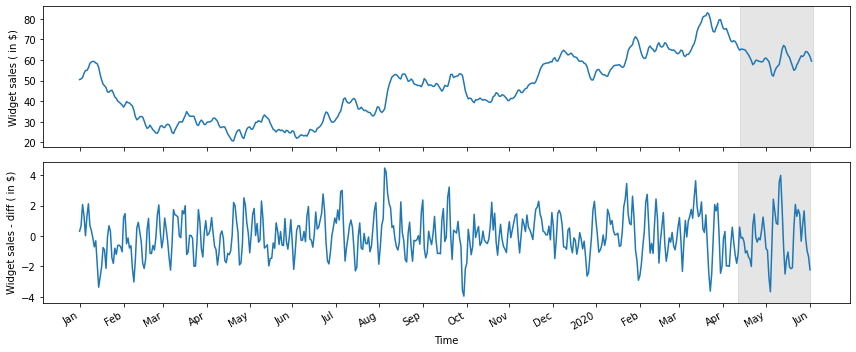

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales ( in $)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff ( in $)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()